In [1]:
import os
import sys
import yaml
import pandas as pd
import numpy as np

sys.path.append("../..")
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

In [2]:
from mia_utils.utils.cifar_data_preparation import get_cifar_dataloader
from mia_utils.utils.cifar_model_preparation import ResNet18, create_trained_model_and_metadata


# Load the config.yaml file
with open('mia_utils/train_config.yaml', 'r') as file:
    train_config = yaml.safe_load(file)

# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), train_config["data"]["data_dir"])

# train_loader, test_loader = get_cifar_dataloader(path, train_config)

In [3]:
# Train the model
if not os.path.exists("target"):
    os.makedirs("target")
if train_config["data"]["dataset"] == "cifar10":
    num_classes = 10
elif train_config["data"]["dataset"] == "cifar100":
    num_classes = 100
else:
    raise ValueError("Invalid dataset name")
print(train_config)

train_acc_list = []
train_loss_list = []
train_indices_list = [] 

test_acc_list = []
test_loss_list = []

for _ in range(32):
    train_loader, test_loader, train_indices= get_cifar_dataloader(path, train_config)
    model = ResNet18(num_classes = num_classes)
    train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model, 
                                                                                train_loader, 
                                                                                test_loader, 
                                                                                train_config)
    train_acc_list.append(train_acc[-1])
    train_loss_list.append(train_loss[-1])
    train_indices_list.append(train_indices)
    test_acc_list.append(test_acc[-1])
    test_loss_list.append(test_loss[-1])

print(train_acc_list)
# print(train_loss_list)
# print(test_acc_list)
# print(test_loss_list)
np.save("./target_acc.npy", train_acc_list)
np.save("./target_train_indices.npy", train_indices_list)

{'run': {'random_seed': 1234, 'log_dir': 'target'}, 'train': {'epochs': 10, 'batch_size': 128, 'optimizer': 'SGD', 'learning_rate': 0.01, 'momentum': 0.9, 'weight_decay': 0.0}, 'data': {'dataset': 'cifar10', 'f_train': 0.5, 'f_test': 0.5, 'data_dir': './data'}}
Files already downloaded and verified
Files already downloaded and verified


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.34s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.37s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.32s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.40s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.35s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:12<00:00,  7.24s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:12<00:00,  7.22s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:20<00:00,  8.07s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:17<00:00,  7.77s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.36s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:09<00:00,  6.96s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:12<00:00,  7.21s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [00:57<00:00,  5.79s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:15<00:00,  7.53s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:01<00:00,  6.17s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.40s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [00:58<00:00,  5.82s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:14<00:00,  7.43s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.36s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:12<00:00,  7.20s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:14<00:00,  7.44s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:12<00:00,  7.25s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:15<00:00,  7.59s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:06<00:00,  6.68s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:10<00:00,  7.03s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.35s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.37s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:13<00:00,  7.32s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:06<00:00,  6.70s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:10<00:00,  7.04s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:11<00:00,  7.19s/it]


Files already downloaded and verified
Files already downloaded and verified


Training Progress: 100%|██████████| 10/10 [01:07<00:00,  6.77s/it]

[0.9196333333333333, 0.9163333333333333, 0.9157333333333333, 0.9141333333333334, 0.9187, 0.9207, 0.9146, 0.9190333333333334, 0.9153333333333333, 0.9168, 0.9124, 0.9132666666666667, 0.9105, 0.9133, 0.9187, 0.9149666666666667, 0.9165333333333333, 0.9083, 0.9237, 0.9155, 0.9126333333333333, 0.9195666666666666, 0.9153333333333333, 0.9173, 0.9127, 0.9121666666666667, 0.9147, 0.9202, 0.9129666666666667, 0.9197666666666666, 0.9158666666666667, 0.923]


In [3]:
from mia_utils.cifar_handler import CifarInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "mia_utils/audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(CifarInputHandler, config_path)

# Run the audit 
mia_results = leakpro.run_audit(return_results=True)

2025-02-26 00:43:03,965 INFO     Target model blueprint created from ResNet18 in ./mia_utils/utils/cifar_model_preparation.py.
2025-02-26 00:43:03,970 INFO     Loaded target model metadata from ./target/model_metadata.pkl


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
2025-02-26 00:43:04,345 INFO     Loaded target model from ./target
2025-02-26 00:43:05,359 INFO     Loaded population dataset from ./data/cifar10.pkl
2025-02-26 00:43:05,361 INFO     Loaded population dataset from ./data/cifar10.pkl
2025-02-26 00:43:05,991 INFO     MIA attack factory loaded.
2025-02-26 00:43:05,992 INFO     Creating shadow model handler singleton
2025-02-26 00:43:05,994 INFO     Creating distillation model handler singleton
2025-02-26 00:43:05,997 INFO     Added attack:

KeyboardInterrupt: 

In [8]:
#### NEW
sm_acc_list = [
    0.9198, 
    0.9148, 
    0.9208, 
    0.9090, 
    0.9175, 
    0.9211, 
    0.9179, 
    0.9232, 
    0.9152, 
    0.9173, 
    0.9214, 
    0.9191, 
    0.9234, 
    0.9226, 
    0.9236, 
    0.9235, 
    0.9157, 
    0.9130, 
    0.9189, 
    0.9157, 
    0.9164, 
    0.9194, 
    0.9103, 
    0.9255, 
    0.9271, 
    0.9245, 
    0.9181, 
    0.9163, 
    0.9194, 
    0.9199, 
    0.9192, 
    0.9276, 
    0.9207, 
    0.9154, 
    0.9186, 
    0.9192, 
    0.9232, 
    0.9207, 
    0.9173, 
    0.9268
]

acc_list = [0.9292, 0.9335666666666667, 0.9263, 0.9302666666666667, 0.9302, 0.9294, 0.9287333333333333, 0.9221666666666667, 0.9244, 0.9151333333333334, 0.9243666666666667, 0.9271666666666667, 0.9251666666666667, 0.9288333333333333, 0.923, 0.9346666666666666, 0.9249666666666667, 0.9324, 0.9287333333333333, 0.9176666666666666, 0.9258333333333333, 0.9227666666666666, 0.9296, 0.9312, 0.931, 0.9193666666666667, 0.9204333333333333, 0.9212333333333333, 0.9237666666666666, 0.9220333333333334, 0.9247, 0.9273333333333333, 0.9230666666666667, 0.9250333333333334, 0.9236, 0.9225666666666666, 0.9224, 0.9292333333333334, 0.9222333333333333, 0.9318666666666666]

In [ ]:
A = {"a": "sadas", "b": "jfgkfdshg", "c": "jfgkfdshg"}
print(A)

# B = A.pop("b")
B = {k:v for k,v in A.items() if k not in ("a")}

print(B)
print(A)

In [ ]:
len(acc_list)

In [ ]:
# acc_list = [l[-1] for l in train_acc_list]
# acc_list = train_acc_list
# test_acc_list = [l[-1] for l in test_acc_list]

print(np.mean(acc_list), np.std(acc_list))
print(np.mean(sm_acc_list), np.std(sm_acc_list))

print(np.mean(test_acc_list), np.std(test_acc_list))



In [ ]:
import matplotlib.pyplot as plt

bins = np.linspace(0.90, 0.95, 20)

plt.hist(acc_list, bins, alpha=0.5)
plt.hist(sm_acc_list, bins, alpha=0.5)
plt.show()

In [ ]:
import scipy 
scipy.stats.ttest_ind(acc_list, sm_acc_list, equal_var=False)

0.9161697916666667 0.004054141909610947
0.89599645 0.0031105534


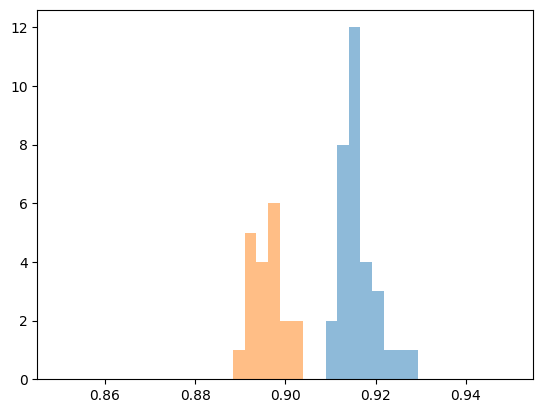

TtestResult(statistic=19.786965553657275, pvalue=1.3478010893870572e-24, df=47.56094066237747)


In [ ]:
import numpy as np 

sm = np.load("./sm_train_acc.npy")
# print(sm)

acc = np.load("./target_acc.npy")
# print(acc)

print(np.mean(acc), np.std(acc))
print(np.mean(sm), np.std(sm))

import matplotlib.pyplot as plt

bins = np.linspace(0.85, 0.95, 40)

plt.hist(acc, bins, alpha=0.5)
plt.hist(sm, bins, alpha=0.5)
plt.show()

import scipy 
print(scipy.stats.ttest_ind(acc, sm, equal_var=False))

In [15]:
import numpy as np 

sm = np.load("./sm_train_indices.npy")
trgt = np.load("./target_train_indices.npy")
print(len(trgt))
print(len(sm))
models = np.concatenate((sm,trgt), axis=0)

m = len(models)
print(m)

X_matrix = np.zeros((m, m))

for i, model_idxs in enumerate(models):
    for j, nodel_idxs in enumerate(models):
        X_matrix[i, j] = len(np.setdiff1d(model_idxs, nodel_idxs)) / len(nodel_idxs)

np.save("./X_matrix.npy", X_matrix)



32
32
(32, 30000) (32, 30000)
64


[0.         0.49976667 0.4985     0.49626667 0.50226667 0.50083333
 0.5013     0.50026667 0.5002     0.49763333 0.499      0.49693333
 0.50023333 0.49926667 0.50336667 0.49886667 0.50113333 0.4989
 0.50193333 0.4974     0.50066667 0.5015     0.5        0.50076667
 0.50053333 0.49803333 0.50423333 0.50186667 0.49983333 0.50026667
 0.50043333 0.4976     0.5039     0.50226667 0.49546667 0.4993
 0.4973     0.50156667 0.5003     0.49983333 0.49923333 0.49906667
 0.50223333 0.50226667 0.50076667 0.49853333 0.5013     0.49456667
 0.5009     0.5009     0.5003     0.5001     0.49936667 0.4995
 0.49546667 0.4982     0.497      0.49986667 0.49646667 0.49983333
 0.5027     0.49773333 0.49973333 0.49636667]


<Axes: >

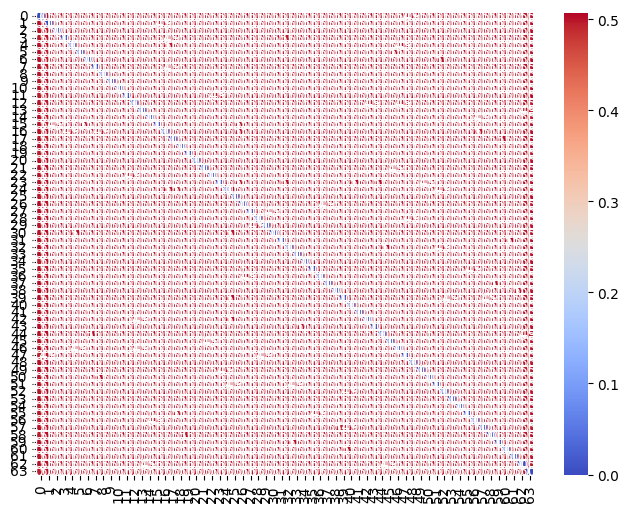

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print(X_matrix[0, :])

for x in X_matrix:
    print("min:", np.min(x[np.nonzero(x)]), "max: ", np.max(x[np.nonzero(x)]))


plt.figure(figsize=(8, 6))
sns.heatmap(X_matrix, annot=True, xticklabels=range(m), yticklabels=range(m), cmap="coolwarm", fmt=".2f")


import numpy as np 

sm = np.load("./sm_train_acc.npy")
# print(sm)

acc = np.load("./target_acc.npy")
# print(acc)

print(np.mean(acc), np.std(acc))
print(np.mean(sm), np.std(sm))

import matplotlib.pyplot as plt

bins = np.linspace(0.85, 0.95, 40)

plt.hist(acc, bins, alpha=0.5)
plt.hist(sm, bins, alpha=0.5)
plt.show()

import scipy 
print(scipy.stats.ttest_ind(acc, sm, equal_var=False))

## Before correct shadow model inheritance

In [ ]:
sm_acc_list = [0.8813 ,0.8695,0.8709,0.8715,0.8648,0.8661,0.8850,0.8630,
               0.8681,0.8761,0.8846,0.8446,0.8226,0.8779,0.8827,0.8676,0.8796,
               0.8799,0.8737,0.8456,0.8654,0.8844,0.8798,0.8618,0.8663,
               0.8498,0.8711,0.8931,0.8490,0.8609,0.8668,0.8740]
sm_loss_list = [0.34125723314095036,0.3692375723351827,0.3634859912573022,0.3602159349842275,0.37791972819795,0.3810889556369882,
                0.33041224815744014,0.39009814530293996,0.37390256435313085,0.35251052233766994,
                0.3296242213946711,0.4380828003299996,0.5083211598244117,0.3475922238319481,
                0.33307770259202785,0.3744919901198529,0.34216405134251787,0.3462118466166742,
                0.35326346571141076,0.44457647331217487,0.38304084028969426,0.3306438162605813,
                0.34603032919954735,0.3883417835578007,0.37594985085281923,0.4288098800689616,
                0.36661235826446653,0.30145846415073313,0.42062046343975873,0.39008328125197833,
                0.37429897981755283,0.3558761631554745]

![title](pre_inheritance_output.png)

TtestResult(statistic=17.575372513532436, pvalue=6.491870506989873e-19, df=34.90285127311654)  
using  "scipy.stats.ttest_ind(acc_list, sm_acc_list, equal_var=False)"